<a href="https://colab.research.google.com/github/youngsoomoon/ML-DL_Basic/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 준비하기

In [ ]:
 import pandas as pd

 fish = pd.read_csv('https://bit.ly/fish_csv_data')
 fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.shape

(159, 6)

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
fish_input.shape

(159, 5)

In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## k-최근접 이웃의 다중 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

# 사이킷런의 개체 속성에 _가 있으면 모델이 데이터로부터 학습한 값을 의미한다.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

In [ ]:
proba = kn.predict_proba(test_scaled[ :5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 로지스틱 회귀
대표적인 분류 알고리즘 중 하나
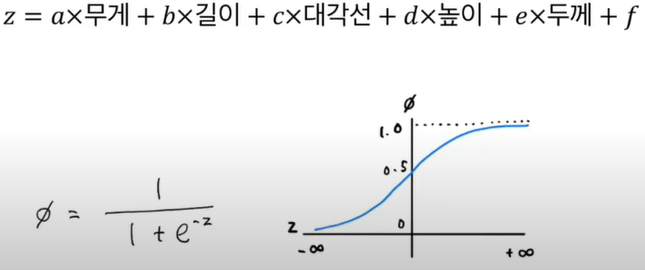

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


## 로지스틱 회귀 계수 확인

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


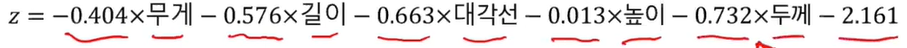

In [ ]:
# decisions는 z값을 확인해보는 함수
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 위 값을 시그모이드 함수에 넣어서 확률값이 나오는지 확인
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
'''
 max_iter는 반복횟수를 조정,기본값 = 100
 로지스틱 회귀는 기본적으로 L2노름 규제 기본적용
 C가 올라가면 규제가 약해진다 (LinearRegression의 alpha와 반대 개념)
 
'''
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


## 소프트맥스 함수

In [ ]:
'''
 decision_function함수는 z값을 출력해줌
 decimals = 2 는 소수 둘째자리까지
'''
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))


[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


scipy라이브러리는 소프트맥스 함수를 계산해주는 메서드가있음<br>
다음식이 소프트맥스 함수식

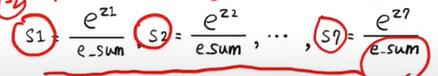

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


**정리** : 시그모이드 함수는 이진분류일때 확률을 표현하기위한 수학적 트릭 <br>
소프트맥스 함수는 다중분류일때 확률을 표현하기위한 수학적 트릭